# RNNs for Time-series
## Contents
1. Feature engineering for TS
2. Helper functions for future examples
3. Example 1: Bitcoin Prediction
4. Example 2: Bike Sharing Prediction
5. Example 3: Real Estate Prediction
## Reference
- https://github.com/thekimk/All-About-Time-Series-Analysis/
- https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44

## Import libraries

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation, visualization and useful functions
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 50
pd.options.display.max_columns = 40
import numpy as np
from itertools import product # iterative combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General(Statistics/Econometrics)
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error
# for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Feature engineering for TS
1. Data shapes
1. Seasonal analysis
1. Manually extract time features

### 1.Data shapes

            BTC-USD
Date               
2017-01-01   998.33
2017-01-02 1,021.75
2017-01-03 1,043.84
2017-01-04 1,154.73
2017-01-05 1,013.38


<AxesSubplot:xlabel='Date'>

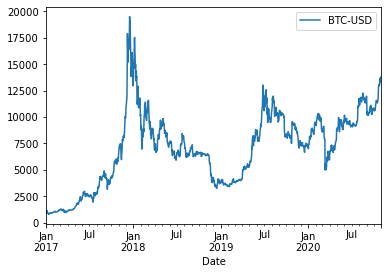

In [2]:
# Bitcoin
bitcoin_location = 'https://raw.githubusercontent.com/thekimk/All-About-Time-Series-Analysis/c0dcc1b31932dc569c3908715c83533f1b6bdb2c/Data/Cryptocurrency/Bitcoin.csv'
bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)
print(bitcoin_all.head())
bitcoin_all.plot()

In [3]:
# Bike sharing
bike_location = 'https://raw.githubusercontent.com/thekimk/All-About-Time-Series-Analysis/c0dcc1b31932dc569c3908715c83533f1b6bdb2c/Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
bike_all = pd.read_csv(bike_location)
bike_all.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
5,2011-01-01 5:00,1,0,0,2,9.84,12.88,75,6.00,0,1,1
6,2011-01-01 6:00,1,0,0,1,9.02,13.63,80,0.00,2,0,2
7,2011-01-01 7:00,1,0,0,1,8.20,12.88,86,0.00,1,2,3
8,2011-01-01 8:00,1,0,0,1,9.84,14.39,75,0.00,1,7,8
9,2011-01-01 9:00,1,0,0,1,13.12,17.43,76,0.00,8,6,14


In [4]:
# Real estiate (Gangnam)
re_location = 'https://raw.githubusercontent.com/thekimk/All-About-Time-Series-Analysis/c0dcc1b31932dc569c3908715c83533f1b6bdb2c/Data/RealestateKorea_Gangnam/Economy.csv'
re_all = pd.read_csv(re_location)
re_all.head(10)

,Price,Date,Region,Price_Sido,Year,Month,Building_Type,Construction_Amount,CD_Rate,Deposit_Rate,Exchange_Rate,Composite_Stock_Price,Economy_Growth,Exchequer_Bond_3Y,Household_Loan_All,Mortgage_All,Number_Of_Nosells,Unsalenum
0,69.50,2006-01-01,48000,69.40,2006,1,0,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
1,64.60,2006-01-01,48000,64.50,2006,1,1,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
2,69.70,2006-01-01,47000,69.30,2006,1,1,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
3,94.20,2006-01-01,45000,94.20,2006,1,7,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
4,80.00,2006-01-01,48000,80.00,2006,1,7,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
5,82.90,2006-01-01,42000,82.90,2006,1,3,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
6,62.10,2006-01-01,28000,62.00,2006,1,0,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
7,94.60,2006-01-01,46000,94.40,2006,1,7,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
8,65.30,2006-01-01,28000,65.20,2006,1,1,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
9,67.60,2006-01-01,26000,67.50,2006,1,0,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN


### 2.Seasonal decomposition with `seasonal_decompose` from `statsmodel`
It splits a time series into three components: trend, seasonality, and the residuals. 
* trend — the general direction of the series over a long period of time
* seasonality — a distinct, repeating pattern observed in regular intervals due to various seasonal factors. Could be monthly, weekly, etc.
* residual — the irregular component consisting of the fluctuations in the time series after removing the previous components

<AxesSubplot:title={'center':'Airline passengers'}, xlabel='Month'>

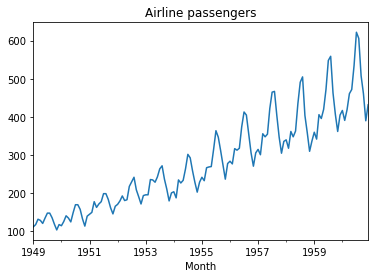

In [5]:
airline_location = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dt = pd.read_csv(airline_location, index_col=0)
dt.index = pd.to_datetime(dt.index)
y = dt["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers")

Benchmark from statsmodels

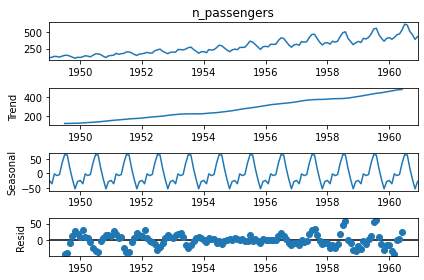

In [6]:
airline_seasonal_decomp = sm.tsa.seasonal_decompose(y, model='additive')
airline_seasonal_decomp.plot();


Manual decomposition

In [7]:
# create the dt
seasonal_dt = y.to_frame()

# calculate the trend component
seasonal_dt["trend"] = seasonal_dt["n_passengers"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_dt["detrended"] = seasonal_dt["n_passengers"] - seasonal_dt["trend"]

# calculate the seasonal component
seasonal_dt.index = pd.to_datetime(seasonal_dt.index)
seasonal_dt["month"] = seasonal_dt.index.month
seasonal_dt["seasonality"] = seasonal_dt.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_dt["resid"] = seasonal_dt["detrended"] - seasonal_dt["seasonality"]

# display the dt
seasonal_dt.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.83,NaN
1949-02-01,118,NaN,NaN,2,-42.03,NaN
1949-03-01,132,NaN,NaN,3,-4.14,NaN
1949-04-01,129,NaN,NaN,4,-6.94,NaN
1949-05-01,121,NaN,NaN,5,-0.70,NaN
1949-06-01,135,NaN,NaN,6,37.15,NaN
1949-07-01,148,125.77,22.23,7,64.92,-42.69
1949-08-01,148,126.85,21.15,8,64.58,-43.43
1949-09-01,136,128.62,7.38,9,15.64,-8.25


Plot results

array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
      dtype=object)

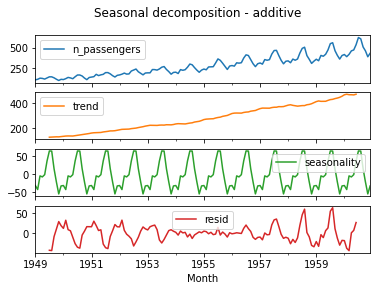

In [8]:
(
    seasonal_dt
    .loc[:, ["n_passengers", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
)


Results comparison (`manual vs seasonal_decompose`)

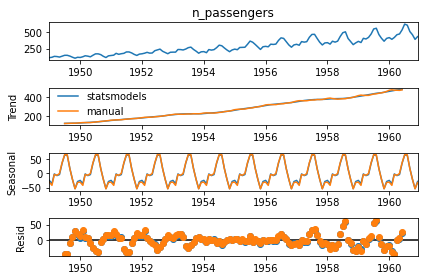

In [9]:

from statsmodels.tsa.seasonal import DecomposeResult


manual_decomposition = DecomposeResult(
    seasonal=seasonal_dt["seasonality"],
    trend=seasonal_dt["trend"],
    resid=seasonal_dt["resid"],
    observed=seasonal_dt["n_passengers"],
)


def add_second_decomp_plot(fig, res, legend):
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)


fig = airline_seasonal_decomp.plot()
add_second_decomp_plot(fig, manual_decomposition, ["statsmodels", "manual"])


Conclusion
* the basic approach to seasonal decomposition splits the time series into three components: trend, seasonal and residuals,
* the trend component is calculated as a centered moving average of the original series,
* the seasonal component is calculated as the per period average of the detrended series,
* the residual component is obtained after removing the trend and seasonal components from the time series.

### 3. Manually extract time features
How to turn `datetime` to day, week, month, quarter, ...

In [10]:
bike_all.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [11]:
bike_all['datetime']


0         2011-01-01 0:00
1         2011-01-01 1:00
2         2011-01-01 2:00
3         2011-01-01 3:00
4         2011-01-01 4:00
               ...       
17374    2012-12-31 19:00
17375    2012-12-31 20:00
17376    2012-12-31 21:00
17377    2012-12-31 22:00
17378    2012-12-31 23:00
Name: datetime, Length: 17379, dtype: object

Day to week, month, quarter, ...

In [12]:
def extract_time(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        raw['DateTime'] = pd.to_datetime(raw['datetime'])

    raw['Year'] = raw.datetime.dt.year
    raw['Quarter'] = raw.datetime.dt.quarter
    raw['Month'] = raw.datetime.dt.month
    raw['Week'] = raw.datetime.dt.day
    raw['Day'] = raw.datetime.dt.day
    raw['Hour'] = raw.datetime.dt.hour
    raw['DayofWeek'] = raw.datetime.dt.dayofweek

    raw_fe = raw.copy()
    return raw_fe

bike_all_time = extract_time(bike_all)
bike_all_time.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,Year,Quarter,Month,Week,Day,Hour,DayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,2011,1,1,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,2011,1,1,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,2011,1,1,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,2011,1,1,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,2011,1,1,1,1,4,5


In [13]:
bike_all_time.tail()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,Year,Quarter,Month,Week,Day,Hour,DayofWeek
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00,2012,4,12,31,31,19,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00,2012,4,12,31,31,20,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00,2012,4,12,31,31,21,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61,2012-12-31 22:00:00,2012,4,12,31,31,22,0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.63,65,9.00,12,37,49,2012-12-31 23:00:00,2012,4,12,31,31,23,0


 Lag using `shift` 

In [14]:
def extract_lag(raw, target='count'):
    raw['count_lag1'] = raw[target].shift(1)
    raw['count_lag2'] = raw[target].shift(2)
    raw['count_lag100'] = raw[target].shift(100)
    raw['count_lag1'].fillna(method='bfill', inplace=True)
    raw['count_lag2'].fillna(method='bfill', inplace=True)
    raw['count_lag100'].fillna(method='bfill', inplace=True)

    raw_fe = raw.copy()
    return raw_fe


bike_all_lag = extract_lag(bike_all)
bike_all_lag.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,Year,Quarter,Month,Week,Day,Hour,DayofWeek,count_lag1,count_lag2,count_lag100
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,2011,1,1,1,1,0,5,16.00,16.00,16.00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,2011,1,1,1,1,1,5,16.00,16.00,16.00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,2011,1,1,1,1,2,5,40.00,16.00,16.00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,2011,1,1,1,1,3,5,32.00,40.00,16.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,2011,1,1,1,1,4,5,13.00,32.00,16.00


<AxesSubplot:>

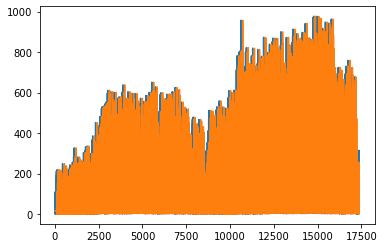

In [15]:
bike_all_lag['count'].plot()
bike_all_lag['count_lag100'].plot()

## Helper functions for future examples

### Feature engineering 


In [16]:
### Feature engineering of default
def non_feature_engineering(raw):
    if 'datetime' in raw.columns:
        raw['datetime'] = pd.to_datetime(raw['datetime'])
        
    if raw.index.dtype == 'int64':
        raw.set_index('DateTime', inplace=True)

    raw = raw.asfreq('H', method='ffill')
    raw_nfe = raw.copy()
    return raw_nfe


### Feature engineering of all
def feature_engineering(raw, target = 'count', seasonal=True, time=True, lag=True):
    raw = non_feature_engineering(raw)

    if seasonal:
        result = sm.tsa.seasonal_decompose(raw[target], model='additive')
        Y_trend = pd.DataFrame(result.trend)
        Y_trend.fillna(method='ffill', inplace=True)
        Y_trend.fillna(method='bfill', inplace=True)
        Y_trend.columns = ['count_trend']
        Y_seasonal = pd.DataFrame(result.seasonal)
        Y_seasonal.fillna(method='ffill', inplace=True)
        Y_seasonal.fillna(method='bfill', inplace=True)
        Y_seasonal.columns = ['count_seasonal']
        pd.concat([raw, Y_trend, Y_seasonal], axis=1).isnull().sum()
        if 'count_trend' not in raw.columns:
            if 'count_seasonal' not in raw.columns:
                raw = pd.concat([raw, Y_trend, Y_seasonal], axis=1)

    Y_count_Day = raw[[target]].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = raw[[target]].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in raw.columns:
        raw = pd.concat([raw, Y_count_Day], axis=1)
    if 'count_Week' not in raw.columns:
        raw = pd.concat([raw, Y_count_Week], axis=1)
    
    # Binning temperatures into groups of 10 degrees
    if 'temp' in raw.columns:
        raw['temp_group'] = pd.cut(raw['temp'], 10)

    if time:
        if 'datetime' in raw.columns:
            raw['Year'] = raw.datetime.dt.year
            raw['Quarter'] = raw.datetime.dt.quarter
            raw['Month'] = raw.datetime.dt.month
            raw['Day'] = raw.datetime.dt.day
            raw['Hour'] = raw.datetime.dt.hour
            raw['DayofWeek'] = raw.datetime.dt.dayofweek
        
        if 'Date' in raw.columns:
            raw['Year'] = raw.Date.dt.year
            raw['Quarter'] = raw.Date.dt.quarter
            raw['Month'] = raw.Date.dt.month
            raw['DayofWeek'] = raw.Date.dt.dayofweek
    
    if lag:
        raw['count_lag1'] = raw[target].shift(1)
        raw['count_lag2'] = raw[target].shift(2)
        raw['count_lag1'].fillna(method='bfill', inplace=True)
        raw['count_lag2'].fillna(method='bfill', inplace=True)
        
    raw_fe = raw.copy()
    return raw_fe


In [17]:
bitcoin_all.head()

,BTC-USD
Date,
2017-01-01,998.33
2017-01-02,"1,021.75"
2017-01-03,"1,043.84"
2017-01-04,"1,154.73"
2017-01-05,"1,013.38"


In [18]:
feature_engineering(bitcoin_all, 'BTC-USD')

,BTC-USD,count_trend,count_seasonal,count_Day,count_Week,count_lag1,count_lag2
Date,,,,,,,
2017-01-01 00:00:00,998.33,998.81,4.30,998.33,"1,006.12",998.33,998.33
2017-01-01 01:00:00,998.33,998.81,3.93,998.33,"1,006.12",998.33,998.33
2017-01-01 02:00:00,998.33,998.81,3.55,998.33,"1,006.12",998.33,998.33
2017-01-01 03:00:00,998.33,998.81,3.18,998.33,"1,006.12",998.33,998.33
2017-01-01 04:00:00,998.33,998.81,2.81,998.33,"1,006.12",998.33,998.33
...,...,...,...,...,...,...,...
2020-10-30 20:00:00,"13,546.52","13,551.41",-3.18,"13,532.94","13,292.50","13,546.52","13,546.52"
2020-10-30 21:00:00,"13,546.52","13,551.41",-3.55,"13,537.47","13,296.16","13,546.52","13,546.52"
2020-10-30 22:00:00,"13,546.52","13,551.41",-3.93,"13,542.00","13,299.82","13,546.52","13,546.52"


In [19]:
bike_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime,Year,Quarter,Month,Week,Day,Hour,DayofWeek,count_lag1,count_lag2,count_lag100
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00,2011,1,1,1,1,0,5,16.00,16.00,16.00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00,2011,1,1,1,1,1,5,16.00,16.00,16.00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00,2011,1,1,1,1,2,5,40.00,16.00,16.00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00,2011,1,1,1,1,3,5,32.00,40.00,16.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00,2011,1,1,1,1,4,5,13.00,32.00,16.00


In [20]:
feature_engineering(bike_all).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Quarter,Month,Week,Day,Hour,DayofWeek,count_lag1,count_lag2,count_lag100,count_trend,count_seasonal,count_Day,count_Week,temp_group
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011,1,1,1,1,0,5,16.00,16.00,16.00,41.06,-134.25,41.04,56.11,"(8.856, 12.874]"
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011,1,1,1,1,1,5,16.00,16.00,16.00,41.06,-154.75,41.04,56.11,"(8.856, 12.874]"
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011,1,1,1,1,2,5,40.00,16.00,16.00,41.06,-165.27,41.04,56.11,"(8.856, 12.874]"
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011,1,1,1,1,3,5,32.00,40.00,16.00,41.06,-176.48,41.04,56.11,"(8.856, 12.874]"
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011,1,1,1,1,4,5,13.00,32.00,16.00,41.06,-181.67,41.04,56.11,"(8.856, 12.874]"


In [21]:
feature_engineering(bike_all)['temp_group'].head()

DateTime
2011-01-01 00:00:00    (8.856, 12.874]
2011-01-01 01:00:00    (8.856, 12.874]
2011-01-01 02:00:00    (8.856, 12.874]
2011-01-01 03:00:00    (8.856, 12.874]
2011-01-01 04:00:00    (8.856, 12.874]
Freq: H, Name: temp_group, dtype: category
Categories (10, interval[float64, right]): [(0.78, 4.838] < (4.838, 8.856] < (8.856, 12.874] < (12.874, 16.892] ... (24.928, 28.946] < (28.946, 32.964] < (32.964, 36.982] < (36.982, 41.0]]

### Train / Test split 

In [22]:


### Data split of cross sectional
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_seed=123):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size=test_size, random_state=random_seed)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_cs(raw_fe, Y_colname, X_colname, 0.2)


### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria,:]
    raw_test = raw.loc[raw.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [23]:



### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual
# Score_tr, Residual_tr = evaluation(Y_train, pred_tr_reg1, graph_on=True)


### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te
# Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)


### Error analysis
def stationarity_adt_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adt = pd.Series(sm.tsa.stattools.adtuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adtuller(Y_Data)[4].items():
            Stationarity_adt['Critical Value(%s)'%key] = value
            Stationarity_adt['Maximum Information Criteria'] = sm.tsa.stattools.adtuller(Y_Data)[5]
            Stationarity_adt = pd.DataFrame(Stationarity_adt, columns=['Stationarity_adt'])
    else:
        Stationarity_adt = pd.Series(sm.tsa.stattools.adtuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adtuller(Y_Data[Target_name])[4].items():
            Stationarity_adt['Critical Value(%s)'%key] = value
            Stationarity_adt['Maximum Information Criteria'] = sm.tsa.stattools.adtuller(Y_Data[Target_name])[5]
            Stationarity_adt = pd.DataFrame(Stationarity_adt, columns=['Stationarity_adt'])
    return Stationarity_adt

def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss


### Load DNN modules

In [24]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Normalization, MultiHeadAttention, Conv1D
from keras.layers import SimpleRNN, LSTM, GRU

## Example 1: Bitcoin Prediction
### MLP

Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
Reshaping for MLP
X_train: (1035, 60) Y_train: (1035, 1)
X_test: (245, 60) Y_test: (245, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                        

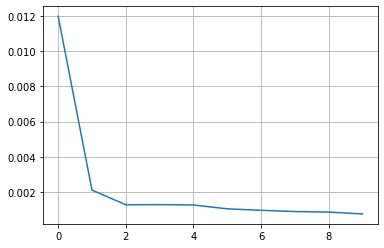

8/8 [==============================] - 0s 1000us/step - loss: 8.9905e-16


,MAE,MSE,MAPE
Train,273.37,"198,491.32",4.12
Test,316.08,"202,099.84",3.64


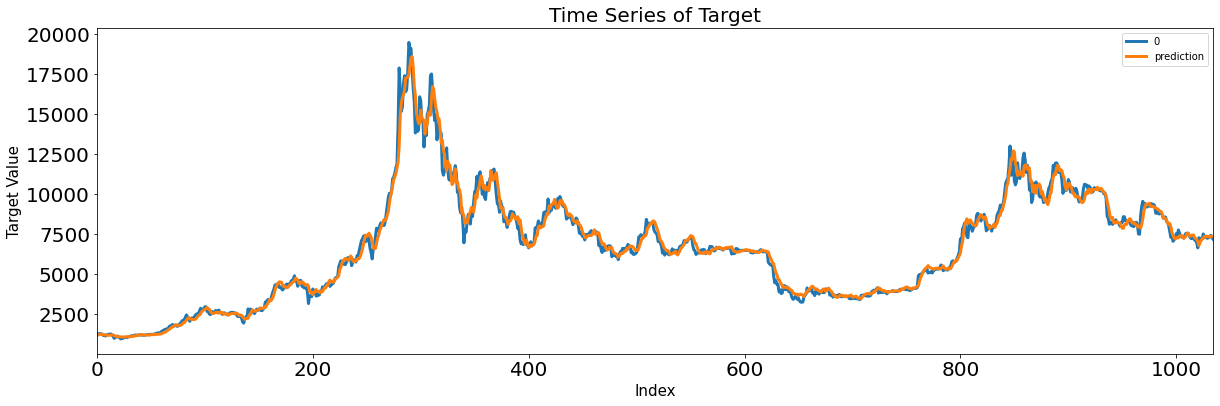

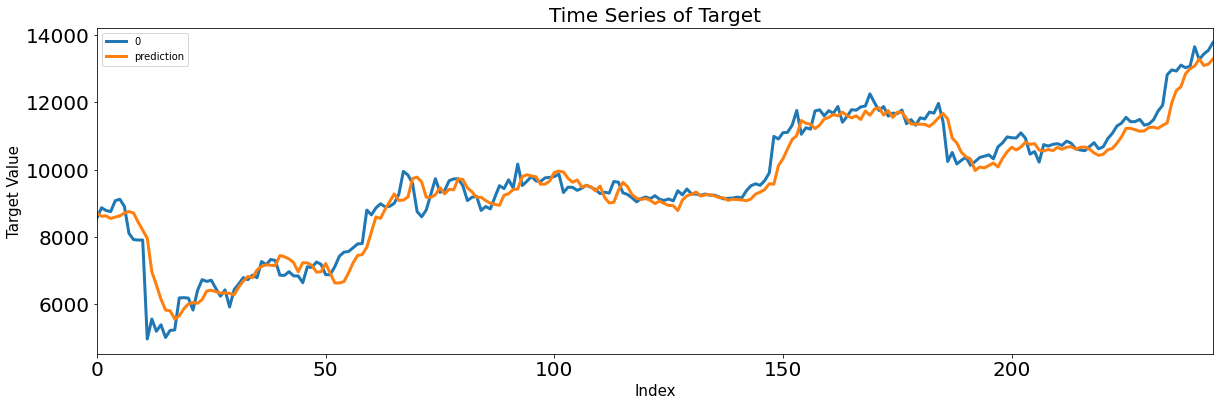

In [25]:
# Data Loading
bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria, :]
test = bitcoin_all.loc[bitcoin_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# MLP
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
print('Reshaping for MLP')
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train,
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_MLP, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(),
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_MLP)


### RNN

Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 128)           16640     
                                                                 
 dropout_4 (Dropout)         (None, 60, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 256)           98560     
                                                                 
 dropout_5 (Dropout)         (None, 60, 256)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 128)           49280     
                                                                 
 dropout_6 (Dropout)         (None, 60, 128)           0        

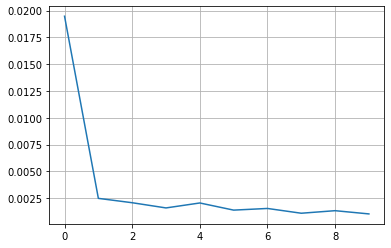

8/8 [==============================] - 0s 14ms/step - loss: 2.1398e-15


,MAE,MSE,MAPE
Train,354.09,"313,372.72",5.25
Test,411.43,"308,978.54",4.74


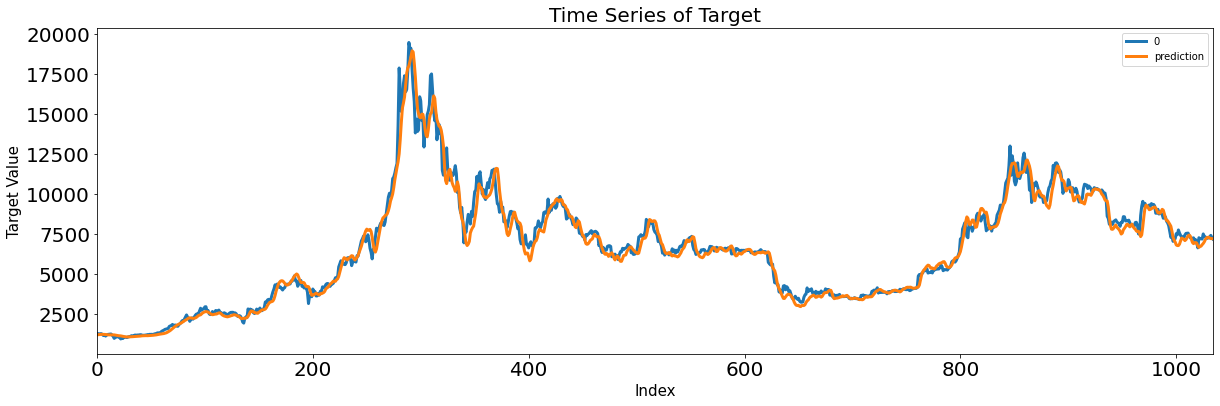

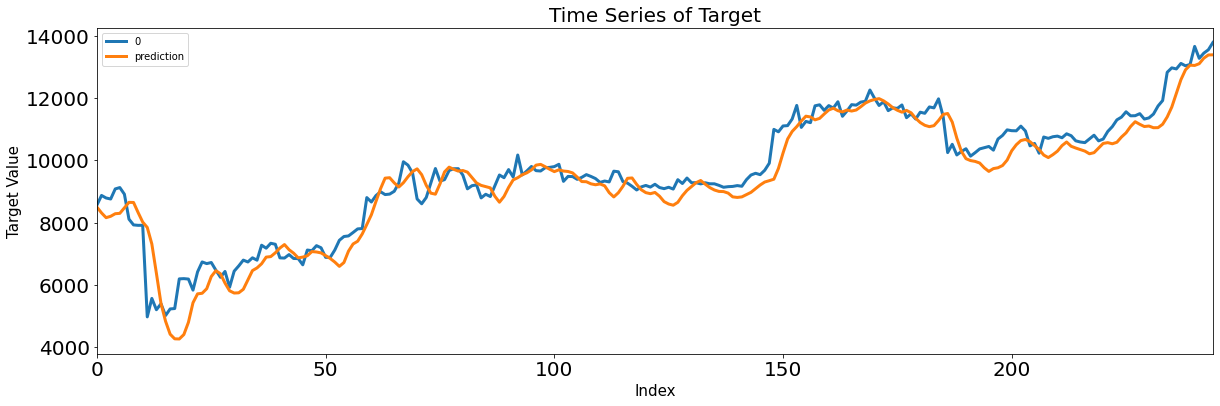

In [26]:

bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria, :]
test = bitcoin_all.loc[bitcoin_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# RNN
model = Sequential()
model.add(SimpleRNN(128, input_shape=(
    X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train,
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_RNN, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(),
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_RNN)


### Find optimal number of sequence

Train_size: (1095, 1) Test_size: (305, 1)


  0%|          | 0/5 [00:00<?, ?it/s]

X_train: (1085, 10, 1) Y_train: (1085, 1)
X_test: (295, 10, 1) Y_test: (295, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 10, 128)           16640     
                                                                 
 dropout_12 (Dropout)        (None, 10, 128)           0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 10, 256)           98560     
                                                                 
 dropout_13 (Dropout)        (None, 10, 256)           0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 10, 128)           49280     
                                                                 
 dropout_14 (Dropout)        (None, 10, 128)           0         
                                        

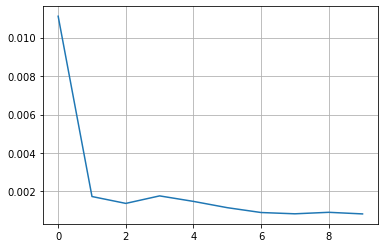

10/10 [==============================] - 0s 4ms/step - loss: 1.2916e-15


 20%|██        | 1/5 [00:06<00:26,  6.60s/it]

X_train: (1075, 20, 1) Y_train: (1075, 1)
X_test: (285, 20, 1) Y_test: (285, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 20, 128)           16640     
                                                                 
 dropout_16 (Dropout)        (None, 20, 128)           0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 20, 256)           98560     
                                                                 
 dropout_17 (Dropout)        (None, 20, 256)           0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 20, 128)           49280     
                                                                 
 dropout_18 (Dropout)        (None, 20, 128)           0         
                                        

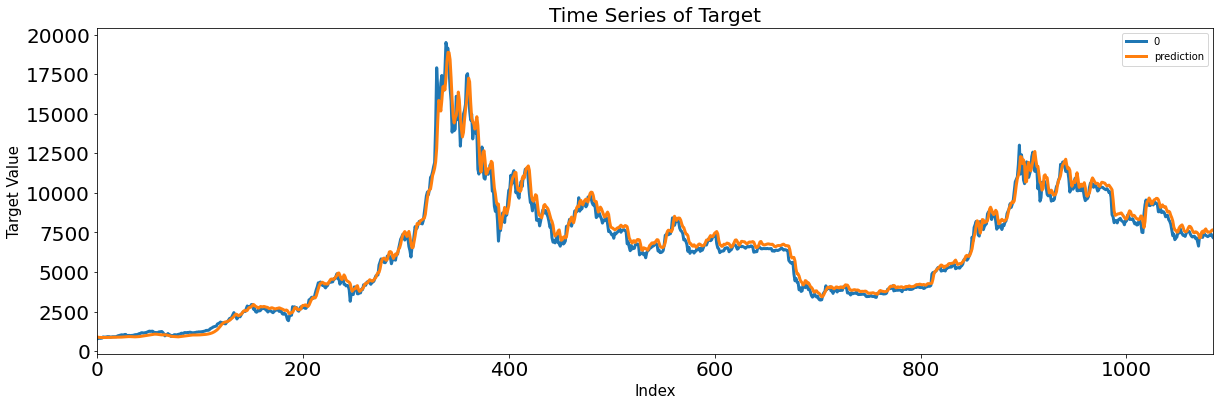

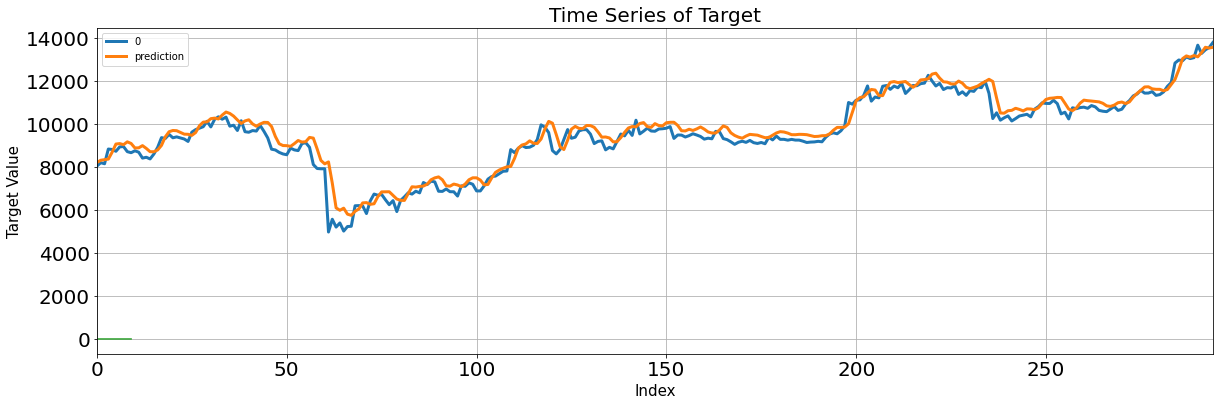

9/9 [==============================] - 0s 6ms/step - loss: 1.6088e-15


 40%|████      | 2/5 [00:15<00:23,  7.72s/it]

X_train: (1065, 30, 1) Y_train: (1065, 1)
X_test: (275, 30, 1) Y_test: (275, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 30, 128)           16640     
                                                                 
 dropout_20 (Dropout)        (None, 30, 128)           0         
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 30, 256)           98560     
                                                                 
 dropout_21 (Dropout)        (None, 30, 256)           0         
                                                                 
 simple_rnn_18 (SimpleRNN)   (None, 30, 128)           49280     
                                                                 
 dropout_22 (Dropout)        (None, 30, 128)           0         
                                        

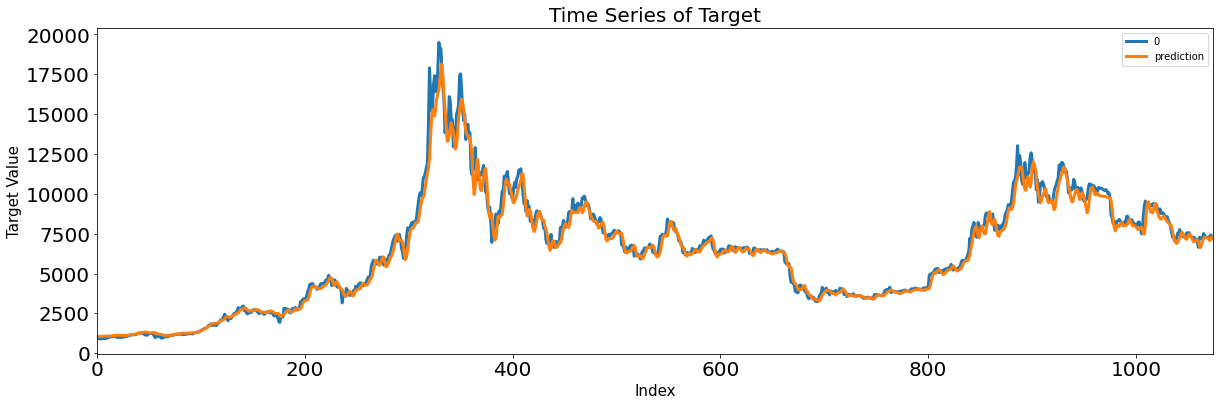

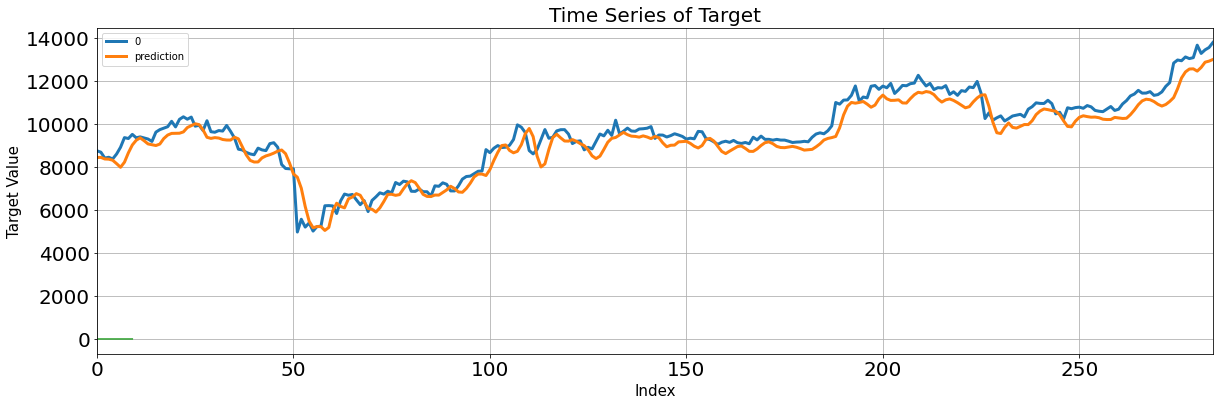

9/9 [==============================] - 0s 10ms/step - loss: 2.5854e-15


 60%|██████    | 3/5 [00:26<00:18,  9.45s/it]

X_train: (1055, 40, 1) Y_train: (1055, 1)
X_test: (265, 40, 1) Y_test: (265, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, 40, 128)           16640     
                                                                 
 dropout_24 (Dropout)        (None, 40, 128)           0         
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 40, 256)           98560     
                                                                 
 dropout_25 (Dropout)        (None, 40, 256)           0         
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 40, 128)           49280     
                                                                 
 dropout_26 (Dropout)        (None, 40, 128)           0         
                                        

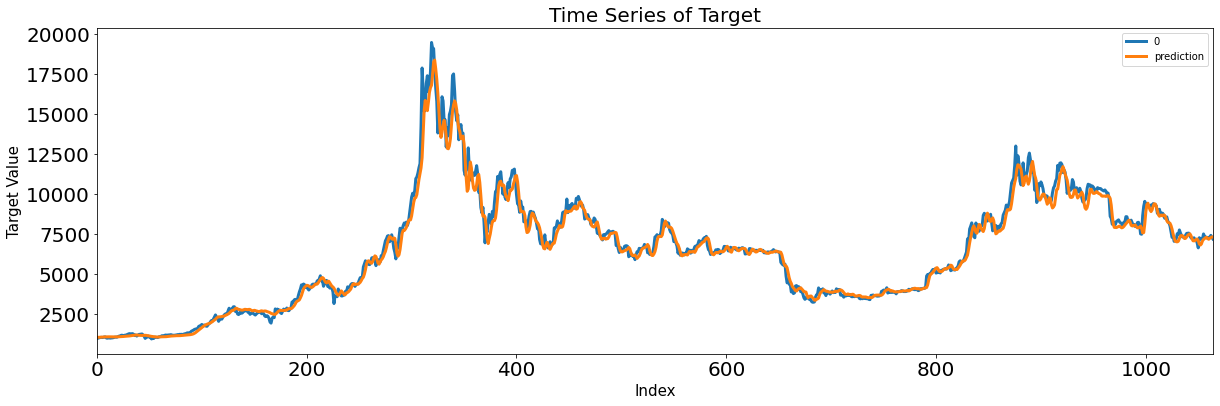

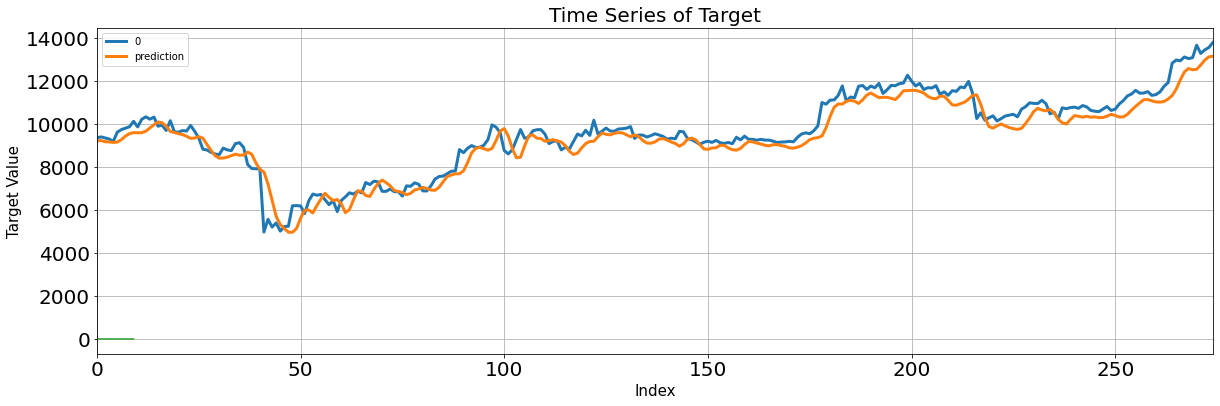

9/9 [==============================] - 0s 11ms/step - loss: 2.2992e-15


 80%|████████  | 4/5 [00:39<00:10, 10.64s/it]

X_train: (1045, 50, 1) Y_train: (1045, 1)
X_test: (255, 50, 1) Y_test: (255, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 50, 128)           16640     
                                                                 
 dropout_28 (Dropout)        (None, 50, 128)           0         
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 50, 256)           98560     
                                                                 
 dropout_29 (Dropout)        (None, 50, 256)           0         
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 50, 128)           49280     
                                                                 
 dropout_30 (Dropout)        (None, 50, 128)           0         
                                        

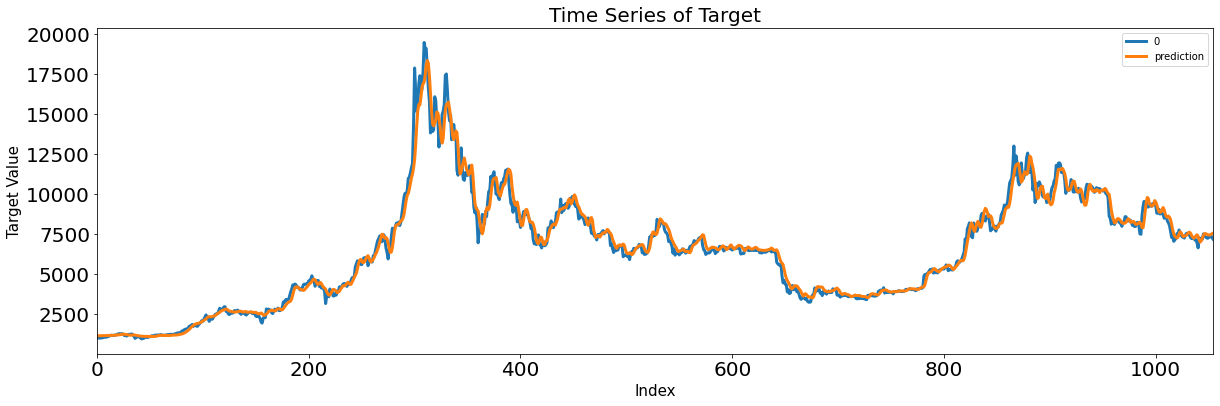

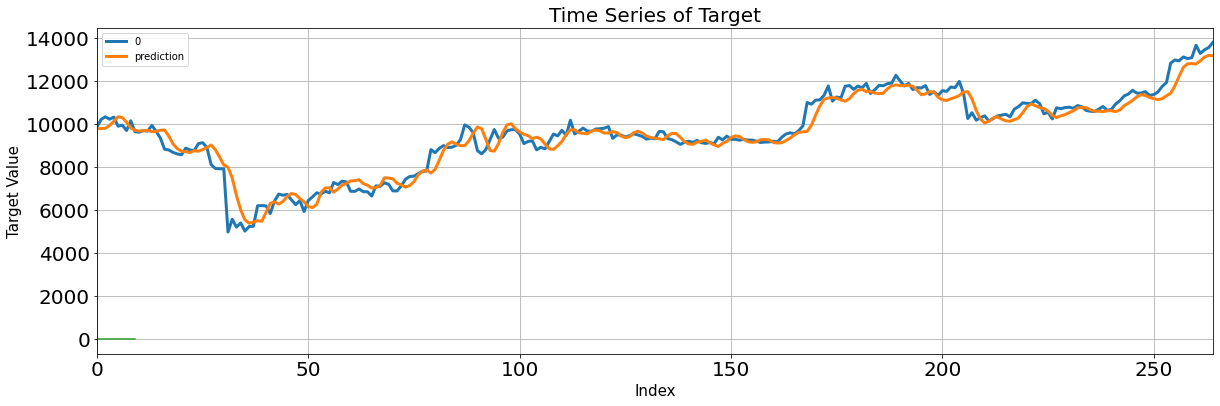

8/8 [==============================] - 0s 14ms/step - loss: 4.0961e-15


100%|██████████| 5/5 [00:54<00:00, 10.83s/it]


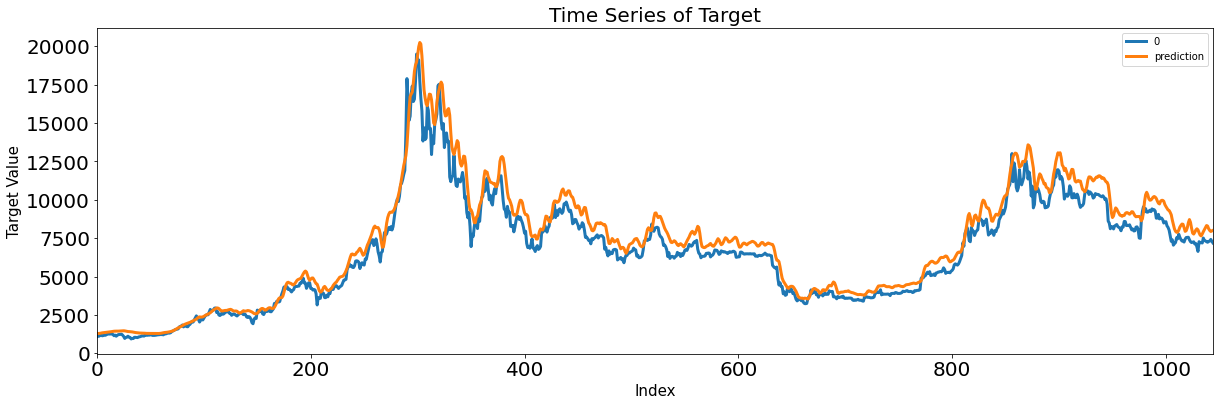

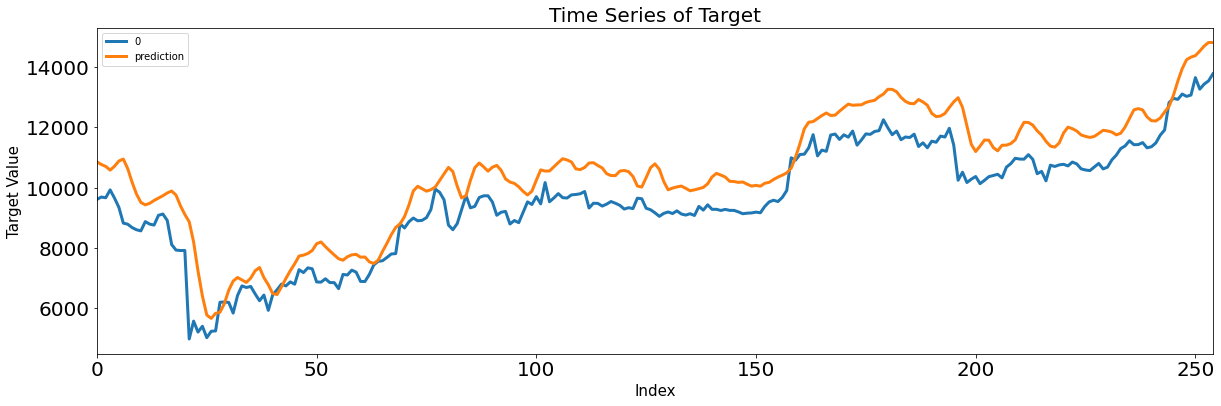

In [28]:
bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria, :]
test = bitcoin_all.loc[bitcoin_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

####################### iterations #######################
Score = dict()
seqsize_list = [i for i in range(10, 60, 10)]
for i in tqdm(seqsize_list):
    sequence = i

    ## X / Y Split
    X_train, Y_train = [], []
    for index in range(len(train_scaled) - sequence):
        X_train.append(train_scaled[index: index + sequence])
        Y_train.append(train_scaled[index + sequence])
    X_test, Y_test = [], []
    for index in range(len(test_scaled) - sequence):
        X_test.append(test_scaled[index: index + sequence])
        Y_test.append(test_scaled[index + sequence])

    ## Retype and Reshape
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_test, Y_test = np.array(X_test), np.array(Y_test)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

    # RNN
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
    model.add(Dropout(dropout_ratio))
    model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
    model.add(Dropout(dropout_ratio))
    model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
    model.add(Dropout(dropout_ratio))
    model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
    model.add(Dropout(dropout_ratio))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    model_fit = model.fit(X_train, Y_train,
                        batch_size=batch_size, epochs=epoch,
                        verbose=verbose)

    plt.plot(pd.DataFrame(model_fit.history))
    plt.grid(True)
    plt.show()

    # prediction
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # evaluation
    result = model.evaluate(X_test, Y_test_pred)
    if scaler != []:
        Y_train = scaler.inverse_transform(Y_train)
        Y_train_pred = scaler.inverse_transform(Y_train_pred)
        Y_test = scaler.inverse_transform(Y_test)
        Y_test_pred = scaler.inverse_transform(Y_test_pred)
    Score_RNN, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(),
                                                        pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
    Score[str(sequence)] = Score_RNN


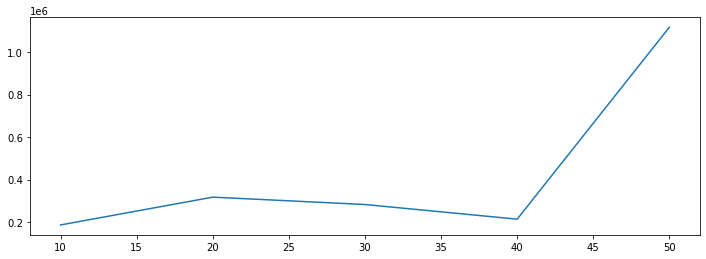

In [29]:
# Performance plot by sequence length
seq_test = pd.DataFrame()
for key, val in Score.items():
    seq_test = pd.concat([seq_test, val.iloc[1,:].T], axis=1)

seq_test = seq_test.T
seq_test.index = seqsize_list
seq_test['MSE'].plot(figsize=(12,4))
plt.show()

### Excercise - Fine optimal number of batch size

### LSTM

Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout_32 (Dropout)        (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 256)           394240    
                                                                 
 dropout_33 (Dropout)        (None, 60, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           197120    
                                                                 
 dropout_34 (Dropout)        (None, 60, 128)           0        

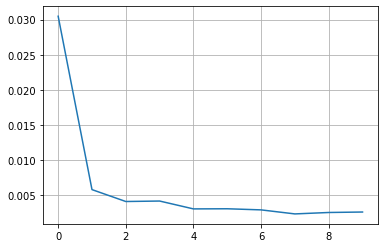

8/8 [==============================] - 1s 70ms/step - loss: 7.2323e-16


,MAE,MSE,MAPE
Train,520.12,"658,551.03",8.17
Test,513.33,"552,049.66",5.92


In [30]:
bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria, :]
test = bitcoin_all.loc[bitcoin_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(
    X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(LSTM(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(LSTM(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(LSTM(64, return_sequences=False, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train,
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(),
                                                       pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=False)
display(Score_LSTM)


### GRU

Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 128)           50304     
                                                                 
 dropout_36 (Dropout)        (None, 60, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 60, 256)           296448    
                                                                 
 dropout_37 (Dropout)        (None, 60, 256)           0         
                                                                 
 gru_2 (GRU)                 (None, 60, 128)           148224    
                                                                 
 dropout_38 (Dropout)        (None, 60, 128)           0        

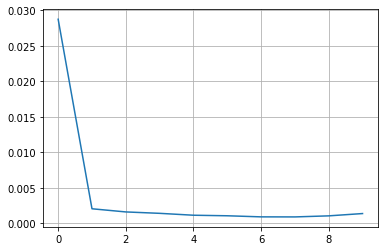

8/8 [==============================] - 1s 37ms/step - loss: 1.8625e-15


,MAE,MSE,MAPE
Train,293.98,"224,251.62",4.72
Test,260.90,"163,468.43",3.10


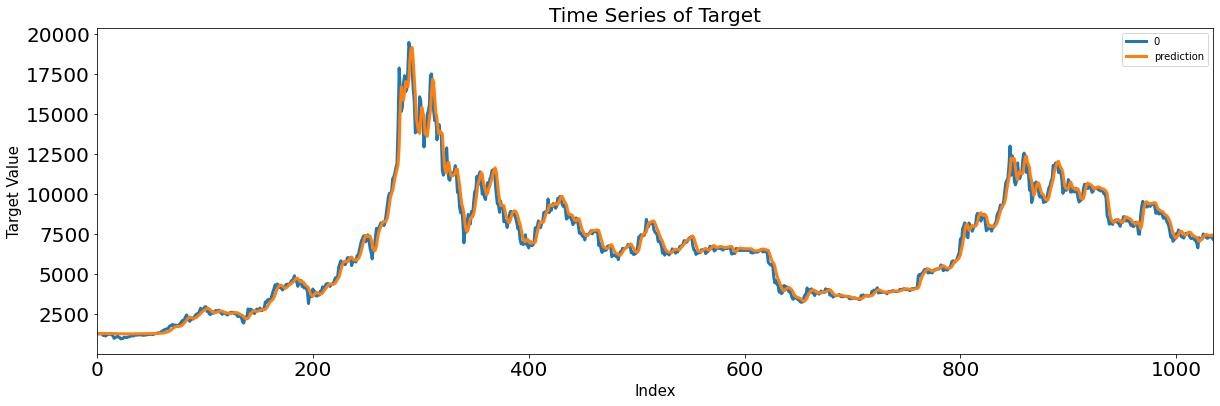

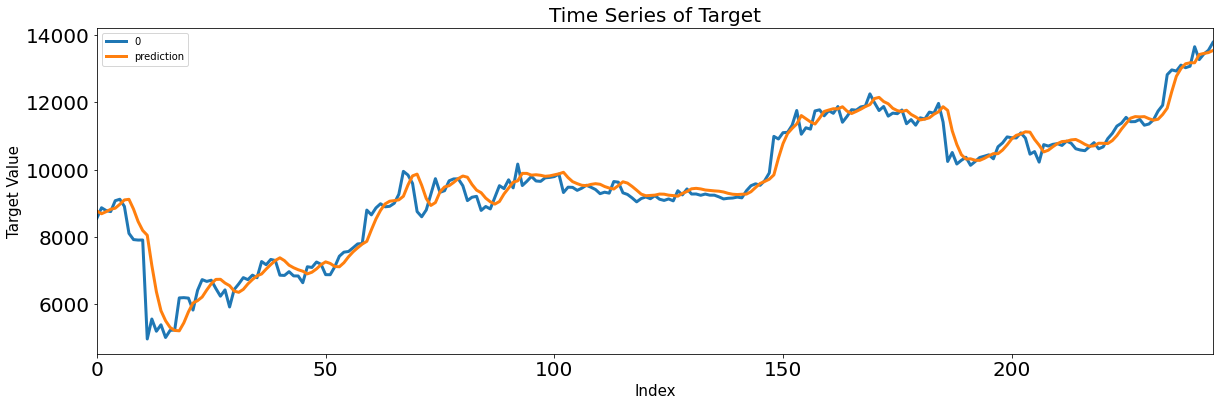

In [31]:

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria,:]
test = bitcoin_all.loc[bitcoin_all.index >= criteria,:]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# GRU
model = Sequential()
model.add(GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(64, return_sequences=False, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_GRU, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_GRU)

### Transformer

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


def build_model(
    input_shape,
    output_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(output_shape)(x)
    return keras.Model(inputs, outputs)

Train_size: (1095, 1) Test_size: (305, 1)
X_train: (1035, 60, 1) Y_train: (1035, 1)
X_test: (245, 60, 1) Y_test: (245, 1)
(60, 1) 1
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 60, 1)       2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 60, 1)       1793        ['layer_normalization[0][0]',    
 dAttention)                                                 

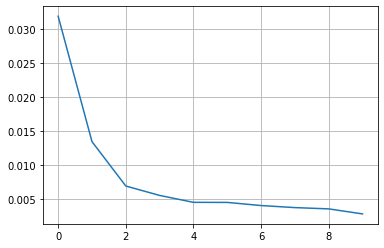

8/8 [==============================] - 0s 11ms/step - loss: 4.7490e-16


,MAE,MSE,MAPE
Train,447.29,"451,084.31",7.33
Test,580.95,"504,890.83",6.35


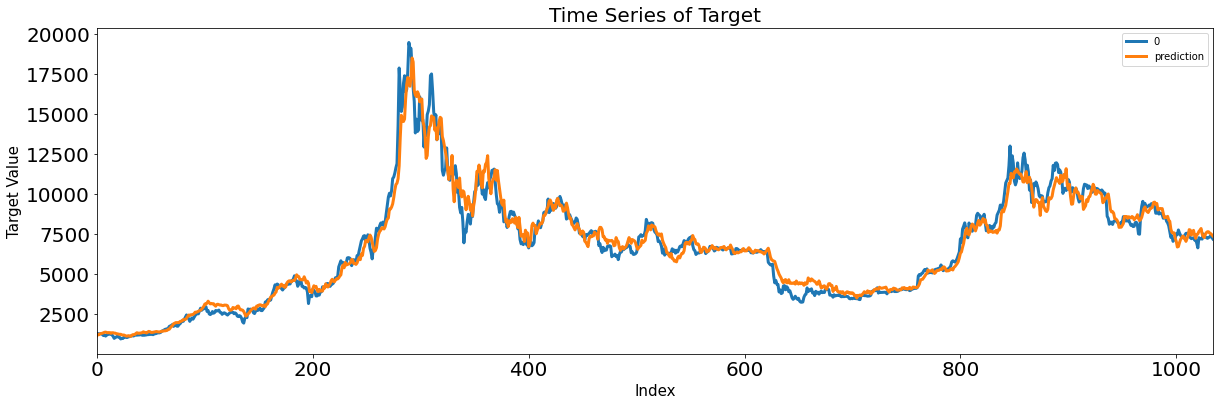

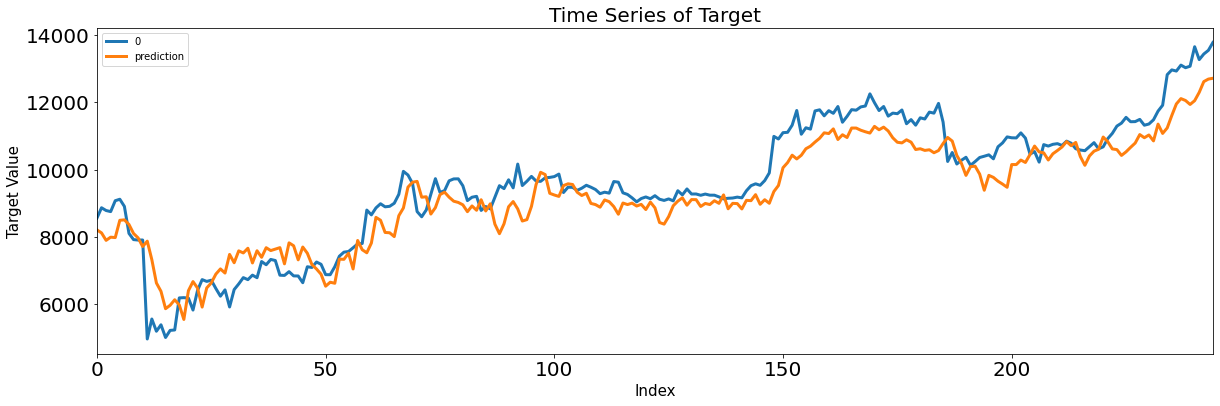

In [33]:
bitcoin_all = pd.read_csv(bitcoin_location, index_col='Date')
bitcoin_all.index = pd.to_datetime(bitcoin_all.index)

# Parameters
criteria = '2020-01-01'
scaler = preprocessing.MinMaxScaler()
sequence = 60
batch_size = 32
epoch = 10
verbose = 1

head_size=128
num_heads=2
ff_dim=2
num_transformer_blocks=1
mlp_units=[64]
mlp_dropout=0.2
dropout_ratio=0.25

# Feature Engineering
## Train & Test Split
train = bitcoin_all.loc[bitcoin_all.index < criteria, :]
test = bitcoin_all.loc[bitcoin_all.index >= criteria, :]
print('Train_size:', train.shape, 'Test_size:', test.shape)

## Scaling
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(train_scaled) - sequence):
    X_train.append(train_scaled[index: index + sequence])
    Y_train.append(train_scaled[index + sequence])
X_test, Y_test = [], []
for index in range(len(test_scaled) - sequence):
    X_test.append(test_scaled[index: index + sequence])
    Y_test.append(test_scaled[index + sequence])

## Retype and Reshape
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = np.array(X_test), np.array(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

input_shape = X_train.shape[1:]
output_shape = Y_train.shape[1]
print(input_shape, output_shape)
# LSTM
model = build_model(
    input_shape,
    output_shape,
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    mlp_units=mlp_units,
    mlp_dropout=mlp_dropout,
    dropout=dropout_ratio)
    
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train,
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler != []:
    Y_train = scaler.inverse_transform(Y_train)
    Y_train_pred = scaler.inverse_transform(Y_train_pred)
    Y_test = scaler.inverse_transform(Y_test)
    Y_test_pred = scaler.inverse_transform(Y_test_pred)
Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(),
                                                       pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_LSTM)


## Example 2: Bike Sharing Prediction

### MLP

<AxesSubplot:xlabel='DateTime'>

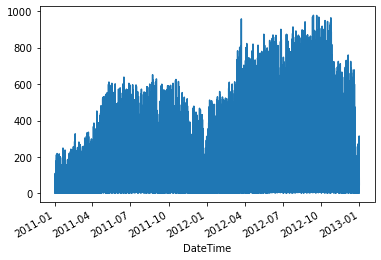

In [34]:
bike_all['count'].plot()

bike_all

Train_size: (13128, 27) Test_size: (4416, 27)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               2944      
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dropout_44 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                 

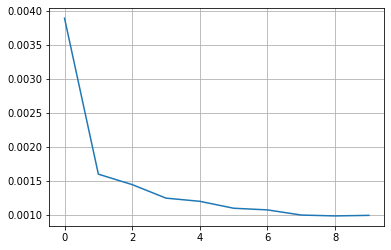

138/138 [==============================] - 0s 2ms/step - loss: 3.4413e-16


,MAE,MSE,MAPE
Train,19.94,851.85,47.61
Test,32.86,"2,305.80",36.20


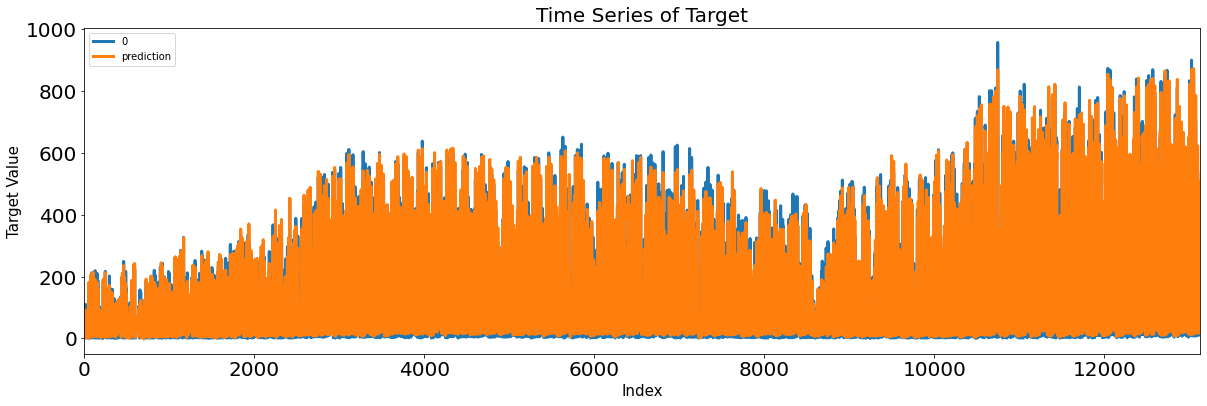

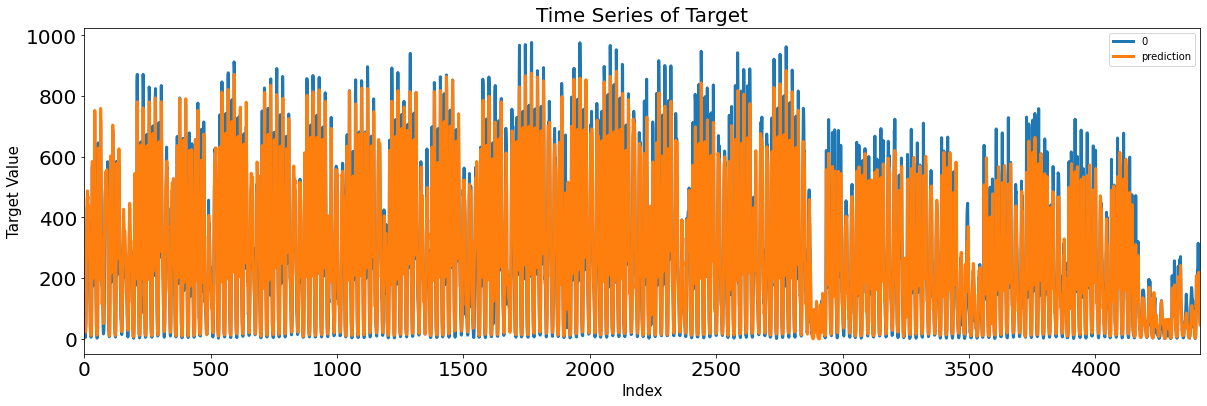

In [35]:

# Feature Engineering
raw_fe = feature_engineering(bike_all,lag=True,seasonal=True,time=True)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')
###############

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
# sequence = 60
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train = scaler_X_tr.fit_transform(X_train_fe)
Y_train = scaler_Y_tr.fit_transform(Y_train_fe)
X_test = scaler_X_tr.transform(X_test_fe)
Y_test = scaler_Y_tr.transform(Y_test_fe)

## Retype and Reshape
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# MLP
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(dropout_ratio))   
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_MLP, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_MLP)


### Excercise - Try different feature engineering options!

### RNN (Sequence = 1)

Train_size: (13128, 27) Test_size: (4416, 27)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
X_train: (13128, 1, 22) Y_train: (13128, 1)
X_test: (4416, 1, 22) Y_test: (4416, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 1, 128)            19328     
                                                                 
 dropout_47 (Dropout)        (None, 1, 128)            0         
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 1, 256)            98560     
                                                                 
 dropout_48 (Dropout)        (None, 1, 256)            0         
                                                                 
 simple_rnn_30 (SimpleRNN)   (None, 1, 128)            49280     
                                           

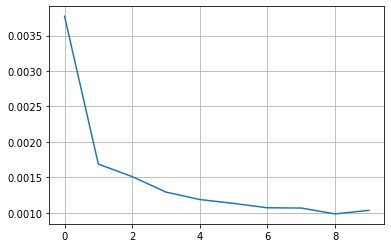

138/138 [==============================] - 1s 1ms/step - loss: 3.9200e-16


,MAE,MSE,MAPE
Train,19.12,781.13,33.55
Test,35.06,"2,475.28",37.99


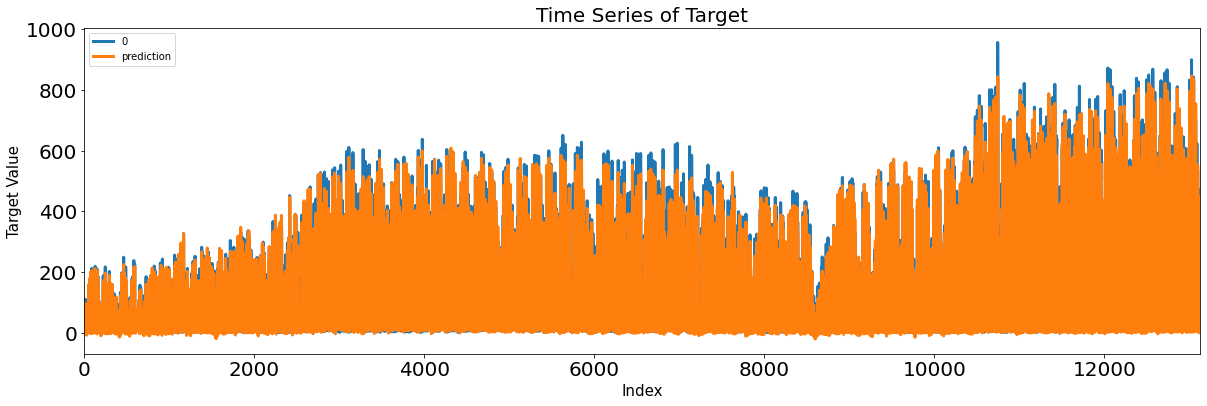

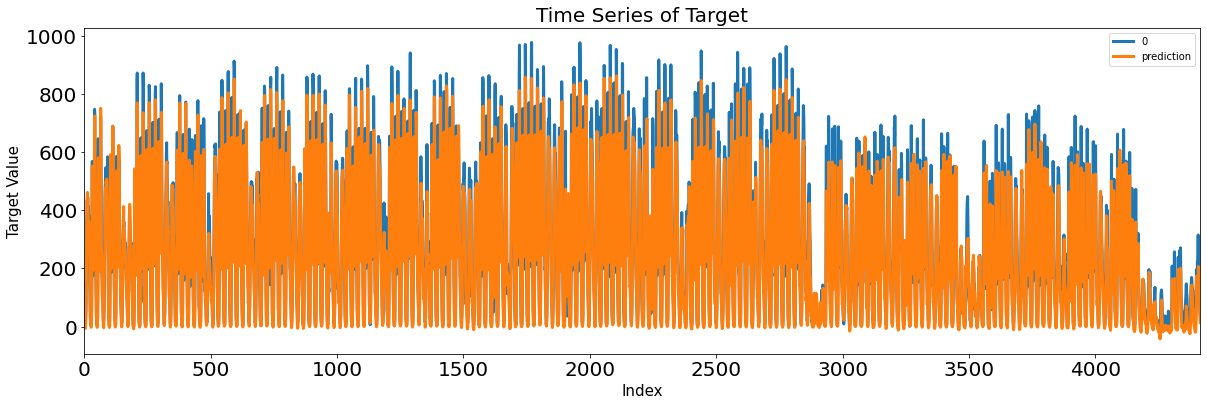

In [36]:
# Feature Engineering
raw_fe = feature_engineering(bike_all,lag=True,seasonal=True,time=True)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')
###############

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
# sequence = 24
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train = scaler_X_tr.fit_transform(X_train_fe)
Y_train = scaler_Y_tr.fit_transform(Y_train_fe)
X_test = scaler_X_tr.transform(X_test_fe)
Y_test = scaler_Y_tr.transform(Y_test_fe)

## Retype and Reshape
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# RNN
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_RNN, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_RNN)

### RNN (sequence = 24)

Train_size: (13128, 27) Test_size: (4416, 27)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
X_train: (13104, 24, 22) Y_train: (13104, 1)
X_test: (4392, 24, 22) Y_test: (4392, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_32 (SimpleRNN)   (None, 24, 128)           19328     
                                                                 
 dropout_51 (Dropout)        (None, 24, 128)           0         
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 24, 256)           98560     
                                                                 
 dropout_52 (Dropout)        (None, 24, 256)           0         
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 24, 128)           49280     
                                         

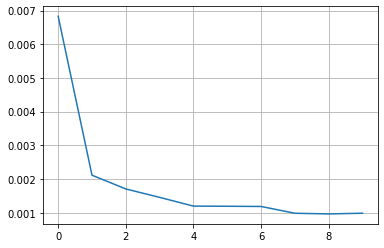

138/138 [==============================] - 2s 9ms/step - loss: 1.0336e-15


,MAE,MSE,MAPE
Train,19.31,744.72,58.18
Test,33.81,"2,313.39",58.29


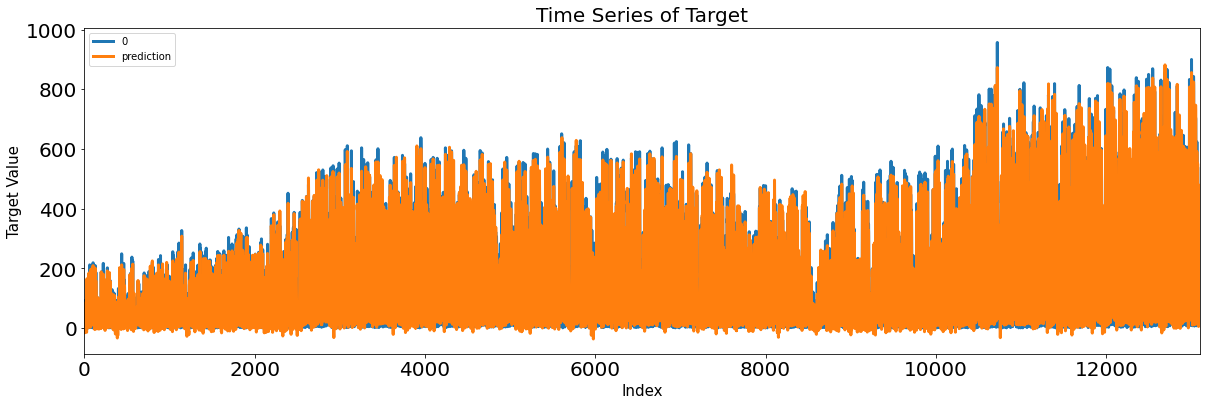

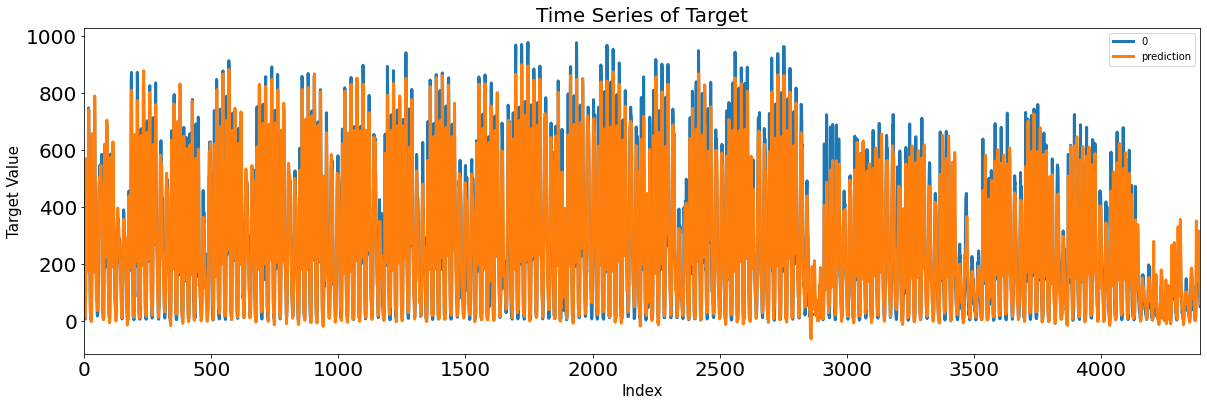

In [37]:
# Feature Engineering
raw_fe = feature_engineering(bike_all,lag=True,seasonal=True,time=True)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')
###############

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
sequence = 24
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train_scaled = scaler_X_tr.fit_transform(X_train_fe)
Y_train_scaled = scaler_Y_tr.fit_transform(Y_train_fe)
X_test_scaled = scaler_X_tr.transform(X_test_fe)
Y_test_scaled = scaler_Y_tr.transform(Y_test_fe)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(X_train_scaled) - sequence):
    X_train.append(np.array(X_train_scaled[index: index + sequence]))
    Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1]))
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = [], []
for index in range(len(X_test_scaled) - sequence):
    X_test.append(np.array(X_test_scaled[index: index + sequence]))
    Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))  
X_test, Y_test = np.array(X_test), np.array(Y_test) 

## Retype and Reshape
X_train = X_train.reshape(X_train.shape[0], sequence, -1)
X_test = X_test.reshape(X_test.shape[0], sequence, -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# RNN
model = Sequential()
model.add(SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(SimpleRNN(64, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_RNN, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_RNN)


### LSTM (sequnce=24)

Train_size: (13128, 27) Test_size: (4416, 27)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
X_train: (13104, 24, 22) Y_train: (13104, 1)
X_test: (4392, 24, 22) Y_test: (4392, 1)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 128)           77312     
                                                                 
 dropout_55 (Dropout)        (None, 24, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 24, 256)           394240    
                                                                 
 dropout_56 (Dropout)        (None, 24, 256)           0         
                                                                 
 lstm_6 (LSTM)               (None, 24, 128)           197120    
                                         

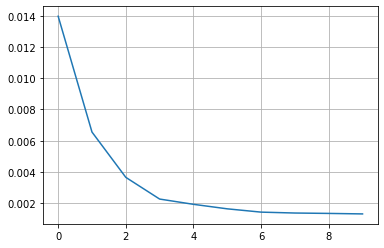

138/138 [==============================] - 4s 29ms/step - loss: 3.5453e-16


,MAE,MSE,MAPE
Train,21.04,983.31,34.98
Test,34.20,"2,564.67",31.39


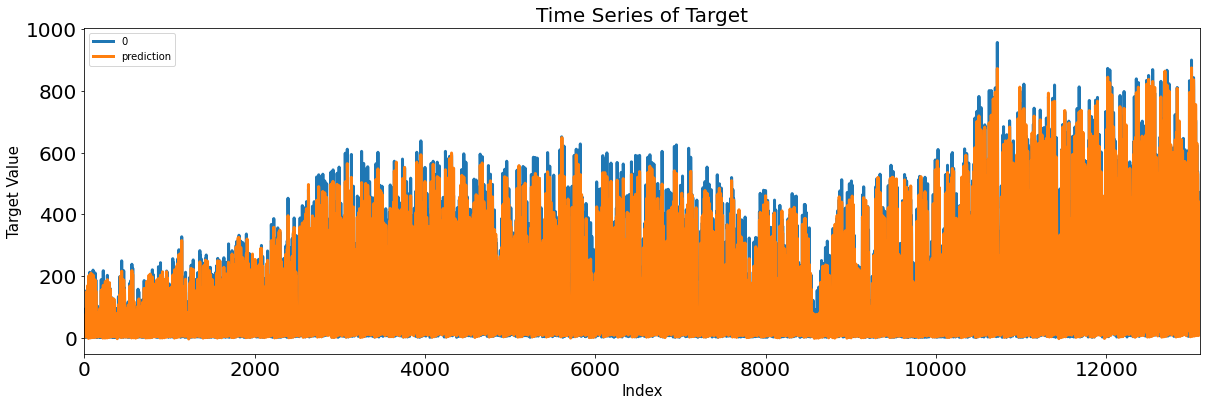

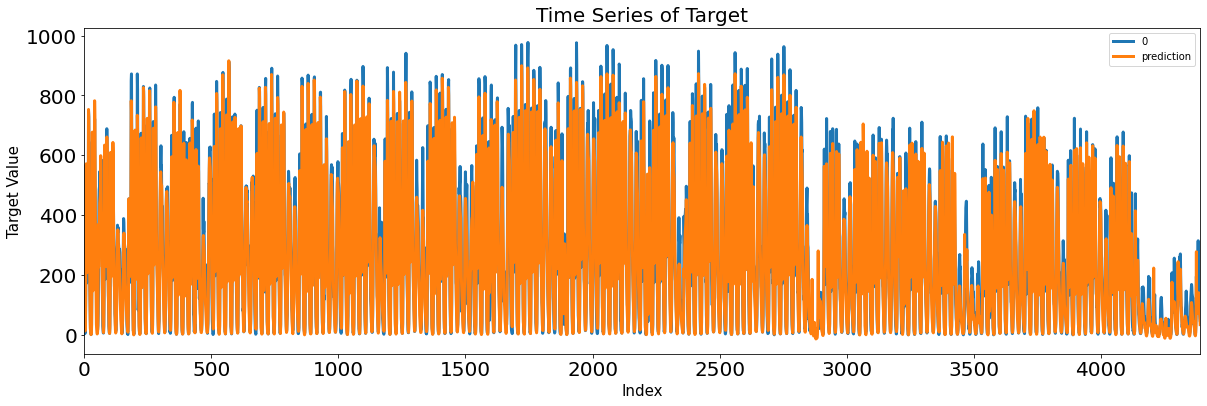

In [38]:
# Feature Engineering
raw_fe = feature_engineering(bike_all,lag=True,seasonal=True,time=True)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')
###############

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
sequence = 24
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train_scaled = scaler_X_tr.fit_transform(X_train_fe)
Y_train_scaled = scaler_Y_tr.fit_transform(Y_train_fe)
X_test_scaled = scaler_X_tr.transform(X_test_fe)
Y_test_scaled = scaler_Y_tr.transform(Y_test_fe)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(X_train_scaled) - sequence):
    X_train.append(np.array(X_train_scaled[index: index + sequence]))
    Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1]))
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = [], []
for index in range(len(X_test_scaled) - sequence):
    X_test.append(np.array(X_test_scaled[index: index + sequence]))
    Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))  
X_test, Y_test = np.array(X_test), np.array(Y_test) 

## Retype and Reshape
X_train = X_train.reshape(X_train.shape[0], sequence, -1)
X_test = X_test.reshape(X_test.shape[0], sequence, -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(LSTM(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(LSTM(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(LSTM(64, return_sequences=False, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_LSTM)


### GRU (sequence = 24)

Train_size: (13128, 27) Test_size: (4416, 27)
X_train: (13128, 22) Y_train: (13128, 1)
X_test: (4416, 22) Y_test: (4416, 1)
X_train: (13104, 24, 22) Y_train: (13104, 1)
X_test: (4392, 24, 22) Y_test: (4392, 1)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 128)           58368     
                                                                 
 dropout_59 (Dropout)        (None, 24, 128)           0         
                                                                 
 gru_5 (GRU)                 (None, 24, 256)           296448    
                                                                 
 dropout_60 (Dropout)        (None, 24, 256)           0         
                                                                 
 gru_6 (GRU)                 (None, 24, 128)           148224    
                                         

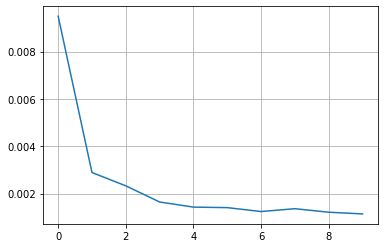

138/138 [==============================] - 3s 20ms/step - loss: 3.2153e-16


,MAE,MSE,MAPE
Train,19.83,904.99,28.28
Test,33.28,"2,504.51",27.01


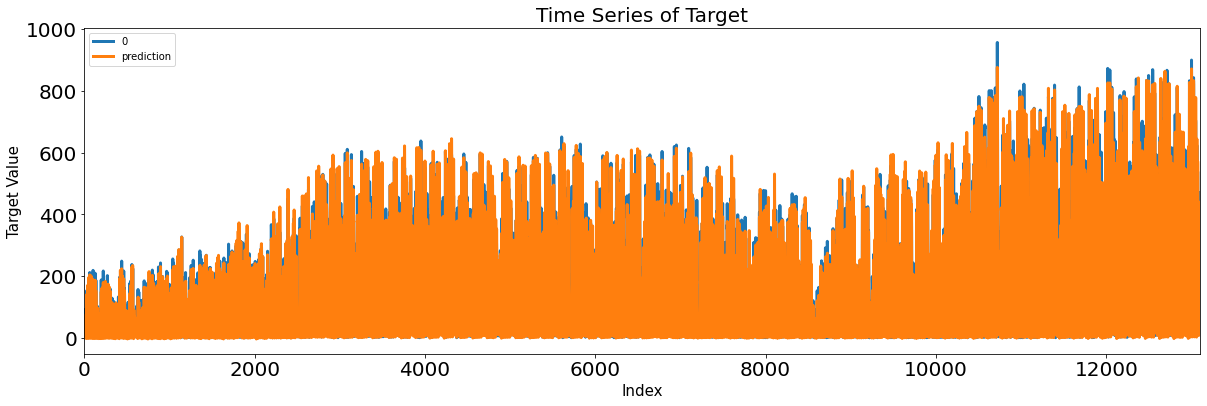

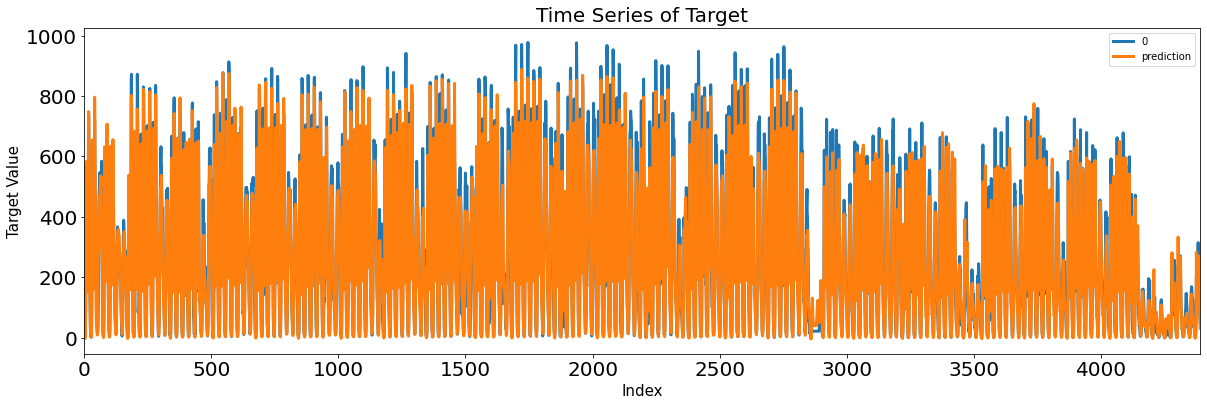

In [39]:
# Feature Engineering
raw_fe = feature_engineering(bike_all,lag=True,seasonal=True,time=True)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')
###############

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
sequence = 24
batch_size = 32
epoch = 10
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train_scaled = scaler_X_tr.fit_transform(X_train_fe)
Y_train_scaled = scaler_Y_tr.fit_transform(Y_train_fe)
X_test_scaled = scaler_X_tr.transform(X_test_fe)
Y_test_scaled = scaler_Y_tr.transform(Y_test_fe)

## X / Y Split
X_train, Y_train = [], []
for index in range(len(X_train_scaled) - sequence):
    X_train.append(np.array(X_train_scaled[index: index + sequence]))
    Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1]))
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test, Y_test = [], []
for index in range(len(X_test_scaled) - sequence):
    X_test.append(np.array(X_test_scaled[index: index + sequence]))
    Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))  
X_test, Y_test = np.array(X_test), np.array(Y_test) 

## Retype and Reshape
X_train = X_train.reshape(X_train.shape[0], sequence, -1)
X_test = X_test.reshape(X_test.shape[0], sequence, -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# GRU
model = Sequential()
model.add(GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(256, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(128, return_sequences=True, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(GRU(64, return_sequences=False, activation="relu"))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_GRU, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_GRU)


### Excercise - Try Transformer with multiple sequence lengths!

## Example 3: Real Estate Prediction

In [40]:
real_estate_location = 'https://raw.githubusercontent.com/thekimk/All-About-Time-Series-Analysis/c0dcc1b31932dc569c3908715c83533f1b6bdb2c/Data/RealestateKorea_Gangnam/Economy.csv'
real_estate_all = pd.read_csv(real_estate_location)
real_estate_all

,Price,Date,Region,Price_Sido,Year,Month,Building_Type,Construction_Amount,CD_Rate,Deposit_Rate,Exchange_Rate,Composite_Stock_Price,Economy_Growth,Exchequer_Bond_3Y,Household_Loan_All,Mortgage_All,Number_Of_Nosells,Unsalenum
0,69.50,2006-01-01,48000,69.40,2006,1,0,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
1,64.60,2006-01-01,48000,64.50,2006,1,1,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
2,69.70,2006-01-01,47000,69.30,2006,1,1,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
3,94.20,2006-01-01,45000,94.20,2006,1,7,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
4,80.00,2006-01-01,48000,80.00,2006,1,7,"4,867,793.00",4.15,4.06,971.00,"1,379.32",1.80,5.02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,94.40,2018-10-01,43000,94.90,2018,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.00,44.00
10140,97.70,2018-10-01,43000,97.90,2018,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.00,44.00
10141,102.80,2018-10-01,43000,102.40,2018,10,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.00,44.00
10142,101.00,2018-10-01,36000,100.90,2018,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
real_estate_all['Date'] = pd.to_datetime(real_estate_all['Date'])
real_estate_all.index = real_estate_all['Date']
real_estate_all = real_estate_all[real_estate_all.index >= '2007-01-01']
real_estate_all = real_estate_all[real_estate_all.index <= '2017-12-31']
real_estate_all.fillna(method='bfill', inplace=True)

# Data Split
Y_colname = ['Price']
X_remove = ['Date', 'Price_Sido']
X_colname = [x for x in real_estate_all.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(real_estate_all, Y_colname, X_colname, '2016-01-01')

Train_size: (7064, 18) Test_size: (1632, 18)
X_train: (7064, 15) Y_train: (7064, 1)
X_test: (1632, 15) Y_test: (1632, 1)


### MLP

X_train: (7064, 15) Y_train: (7064, 1)
X_test: (1632, 15) Y_test: (1632, 1)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               2048      
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_______________________________________

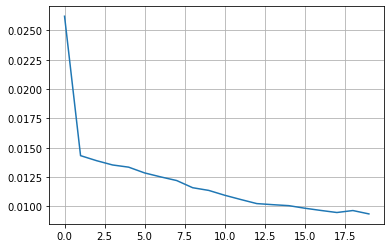

51/51 [==============================] - 0s 720us/step - loss: 2.0506e-15


,MAE,MSE,MAPE
Train,3.80,27.63,4.39
Test,3.67,19.55,3.70


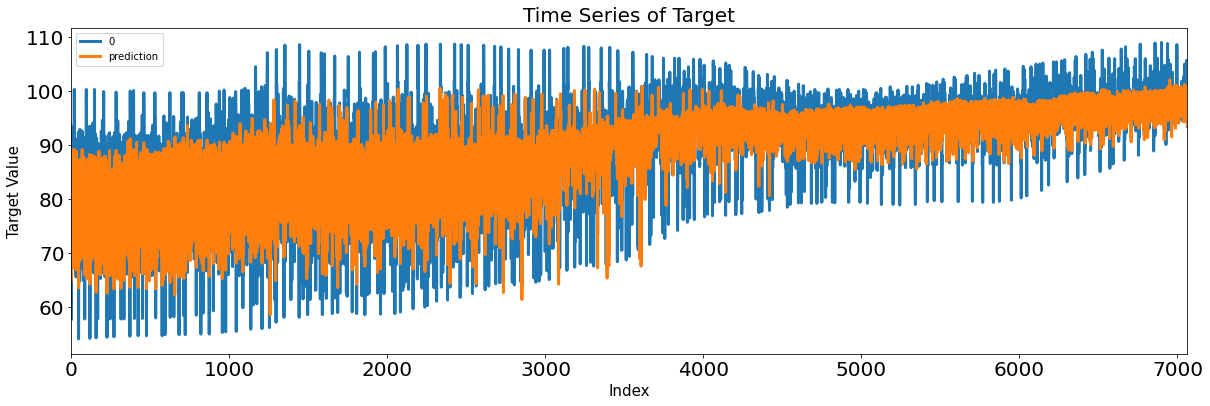

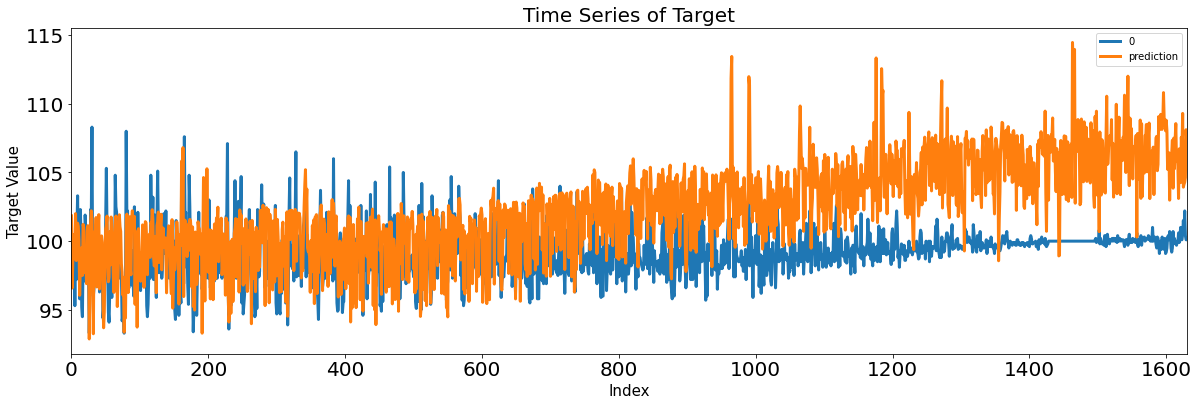

In [42]:

# Parameters
scaler_X_tr = preprocessing.MinMaxScaler()
scaler_Y_tr = preprocessing.MinMaxScaler()
# sequence = 34
batch_size = 32
epoch = 20
verbose = 1
dropout_ratio = 0

# Feature Engineering
## Scaling
X_train = scaler_X_tr.fit_transform(X_train)
Y_train = scaler_Y_tr.fit_transform(Y_train)
X_test = scaler_X_tr.transform(X_test)
Y_test = scaler_Y_tr.transform(Y_test)

## Retype and Reshape
# X_train = X_train.reshape(X_train.shape[0], sequence, -1)
# X_test = X_test.reshape(X_test.shape[0], sequence, -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# MLP
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(dropout_ratio)) 
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(dropout_ratio)) 
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(dropout_ratio)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_ratio)) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
model_fit = model.fit(X_train, Y_train, 
                      batch_size=batch_size, epochs=epoch,
                      verbose=verbose)

plt.plot(pd.DataFrame(model_fit.history))
plt.grid(True)
plt.show()

# prediction
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# evaluation
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_tr != []:
    Y_train = scaler_Y_tr.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_tr.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_tr.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_tr.inverse_transform(Y_test_pred)
Score_MLP, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_MLP)

### Excercise - Try several models with real-estate data and find optimal model!

In [43]:
### RNN

In [44]:
### LSTM

In [45]:
### GRU

In [46]:
### Transformer